# 2. Image denoising

Read paper Beyond a Gaussian Denoiser: Residual Learning of Deep CNN for Image Denoising (https://arxiv.org/abs/1608.03981). From the class drive download archive DnCNN.zip which contains the dataset, data preparation, training and testing scripts. You are provided with DnCNN-s model pretrained to denoise images with σ=25.

main references:

     https://github.com/mozhuqing/fcn/blob/f6213010926c561b3e4f35eb5ee59b7ccc6390ec/data_augmentation.ipynb
     https://github.com/jedichien/ssd_keras/blob/b3008773d833501da1b7a21e8c37e6640e229d5f/T3_AssignBBoxes.ipynb
     https://github.com/zplab-dev/Nicolette/blob/398be5b8a306972dfc4d530687b1a8ae290bcae5/image_analysis/analyze_images.py

a) Briefly explain how the authors have decided on the particular network depth. Which tasks is the DnCNN-3 designed to solve?

Answer:

     i) The author sets the convolution kernel size of DnCNN to 3 * 3 and removes all pooling layers. For a single-layer convolution network, the size of the receptive field corresponding to each feature point on the feature map is equal to the size of the convolution layer filter; for the multi-layer convolution network, it can be fed back layer by layer, and the size of the receptive field in the original input image can be obtained through repeated iterations, that is, the size of the receptive field in the deep convolution layer behind is related to the filter size and step size of all previous network layers.

     For DnCNN network, when the number of network layers is d, the receptive field of the network is (2d + 1) * (2d + 1). The receptive field of dncnn is related to the network depth D, while the receptive field of convolutional neural network can be compared with the effective patch size of traditional denoising algorithm. Therefore, the author refers to the most mainstream denoising algorithms, and according to 2d + 1 = effective patch size, reversely deduces a suitable network depth of DnCNN.

     Finally,In order to capture enough spatial information, the author chooses 36 * 36 of EPLL as the reference standard with noise level of 25, because the effective patch size of EPLL is the smallest. The depth of dncnn for Gaussian denoising is 17, and the depth of DnCNN for general denoising task is 20.

     ii) DnCNN-3 is used for image denoising. Batch normalization and residual learning are integrated to speed up the training process and improve denoising performance. This DnCNN-3 model has the ability to handle blind Gaussian denoising with unknown noise levels.

b) Use main_test.py to test the pretrained model on denoising the whole Set68 with σ=25 and report the obtained average PSNR and SSIM metrics. Download YourEmail_sigma.csv that contains specific value of σ. Test the same model on the same set corrupted by this particular σ and report the results.

In [2]:
%run main_test_b25.py

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:512: SourceChangeWarning: source code of class '__main__.DnCNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:512: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:512: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_p

2019-11-18 15:30:59: load trained model
     Set68 : test028.png : 0.0814 second
     Set68 : test006.png : 0.0789 second
     Set68 : test029.png : 0.0794 second
     Set68 : test017.png : 0.0789 second
     Set68 : test067.png : 0.0796 second
     Set68 : test057.png : 0.0789 second
     Set68 : test065.png : 0.0790 second
     Set68 : test051.png : 0.0790 second
     Set68 : test001.png : 0.0797 second
     Set68 : test013.png : 0.0790 second
     Set68 : test032.png : 0.0790 second
     Set68 : test058.png : 0.0790 second
     Set68 : test041.png : 0.0789 second
     Set68 : test060.png : 0.0790 second
     Set68 : test063.png : 0.0791 second
     Set68 : test054.png : 0.0796 second
     Set68 : test024.png : 0.0791 second
     Set68 : test004.png : 0.0791 second
     Set68 : test042.png : 0.0789 second
     Set68 : test066.png : 0.0791 second
     Set68 : test009.png : 0.0790 second
     Set68 : test059.png : 0.0792 second
     Set68 : test049.png : 0.0789 second
     Set68 : test

In [5]:
import pandas as pd
csv2=pd.read_csv('XZHANG6@TCD.IE_sigma.csv')
csv2.head(3)

,37


In [10]:
%run main_test_b37.py

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:512: SourceChangeWarning: source code of class '__main__.DnCNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:512: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:512: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_p

2019-11-18 15:54:46: load trained model
     Set68 : test028.png : 0.0793 second
     Set68 : test006.png : 0.0790 second
     Set68 : test029.png : 0.0794 second
     Set68 : test017.png : 0.0790 second
     Set68 : test067.png : 0.0795 second
     Set68 : test057.png : 0.0790 second
     Set68 : test065.png : 0.0791 second
     Set68 : test051.png : 0.0789 second
     Set68 : test001.png : 0.0796 second
     Set68 : test013.png : 0.0791 second
     Set68 : test032.png : 0.0791 second
     Set68 : test058.png : 0.0789 second
     Set68 : test041.png : 0.0790 second
     Set68 : test060.png : 0.0792 second
     Set68 : test063.png : 0.0791 second
     Set68 : test054.png : 0.0795 second
     Set68 : test024.png : 0.0793 second
     Set68 : test004.png : 0.0791 second
     Set68 : test042.png : 0.0790 second
     Set68 : test066.png : 0.0789 second
     Set68 : test009.png : 0.0791 second
     Set68 : test059.png : 0.0793 second
     Set68 : test049.png : 0.0791 second
     Set68 : test

c) Finetune the pre-trained model using script main_train.py for 1 epoch with learning rate 0.0001 with σ level given from YourEmail_sigma.csv and test its performance (PSRN/SSIM) on Set68 using this corruption level.

In [11]:
%run main_train_fine.py

===> Building model
resuming by loading epoch 000


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


training data finished
   1    0 / 11390 loss = 3.6133
   1  100 / 11390 loss = 2.9871
   1  200 / 11390 loss = 2.6942
   1  300 / 11390 loss = 2.3620
   1  400 / 11390 loss = 2.1930
   1  500 / 11390 loss = 2.0399
   1  600 / 11390 loss = 2.1270
   1  700 / 11390 loss = 1.7493
   1  800 / 11390 loss = 1.6886
   1  900 / 11390 loss = 1.6603
   1 1000 / 11390 loss = 1.8002
   1 1100 / 11390 loss = 1.9602
   1 1200 / 11390 loss = 1.6682
   1 1300 / 11390 loss = 1.7139
   1 1400 / 11390 loss = 1.7712
   1 1500 / 11390 loss = 1.8223
   1 1600 / 11390 loss = 2.0812
   1 1700 / 11390 loss = 1.7096
   1 1800 / 11390 loss = 1.9449
   1 1900 / 11390 loss = 1.8372
   1 2000 / 11390 loss = 1.9960
   1 2100 / 11390 loss = 2.0903
   1 2200 / 11390 loss = 1.9423
   1 2300 / 11390 loss = 1.6355
   1 2400 / 11390 loss = 1.8820
   1 2500 / 11390 loss = 1.8893
   1 2600 / 11390 loss = 1.5854
   1 2700 / 11390 loss = 1.8562
   1 2800 / 11390 loss = 2.0158
   1 2900 / 11390 loss = 1.8101
   1 3000 / 11390

d) Download YourEmail_XXX.png containing corrupted version of data/Test/Set68/testXXX.png. Denoise this image with the pre-trained model, submit it as YourEmail_XXX_pretrained.png and save both PSNR, SSIM values for this image in 2 columns preserving ordering, in a file named YourEmail_psnr.csv. Repeat the procedure with your finetuned model, save result to YourEmail_XXX_clean.png and report PSNR and SSIM of this image as a second row of YourEmail_psnr.csv.

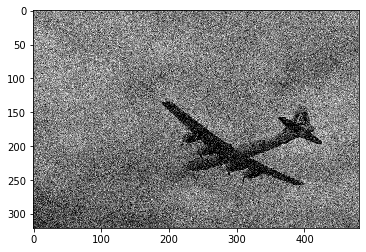

In [15]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread ('./XZHANG6@TCD.IE_066.png', cv2.IMREAD_COLOR) 
rgb_img1=img1[:,:,::-1] 
plt.imshow(rgb_img1) 
plt.show()

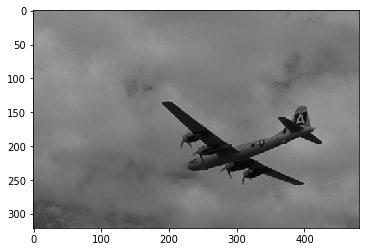

In [16]:
img2 = cv2.imread ('./test066.png', cv2.IMREAD_COLOR) 
rgb_img2=img2[:,:,::-1] 
plt.imshow(rgb_img2) 
plt.show()

2019-11-18 18:24:31: load trained model
   test066 : XZHANG6@TCD.IE_066.png : 0.0790 second


/notebooks/main_test_d_pre.py:140: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr_x_ = compare_psnr(x, x_)
/notebooks/main_test_d_pre.py:141: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_x_ = compare_ssim(x, x_)


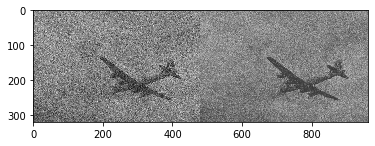

2019-11-18 18:24:32: Datset: test066    
  PSNR = 21.70dB, SSIM = 0.8206


In [26]:
%run main_test_d_pre.py

2019-11-18 18:24:34: load trained model
   test066 : XZHANG6@TCD.IE_066.png : 0.0791 second


/notebooks/main_test_d_fine.py:140: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr_x_ = compare_psnr(x, x_)
/notebooks/main_test_d_fine.py:141: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_x_ = compare_ssim(x, x_)


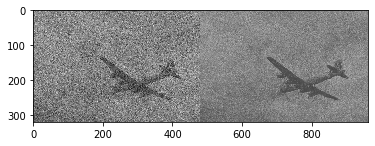

2019-11-18 18:24:34: Datset: test066    
  PSNR = 19.66dB, SSIM = 0.6885


In [27]:
%run main_test_d_fine.py

In [28]:
final=pd.DataFrame([['21.70dB','0.8206'],['19.66dB','0.6885']])
final.to_csv('XZHANG6@TCD.IE_psnr.csv',index=['pre','fine'],header=['PSNR','SSIM'])
final.head(3)

,0,1
0,21.70dB,0.8206
1,19.66dB,0.6885
